In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
OneSector_data = pd.read_csv('OneSector_data.csv')

In [3]:
OneSector_data['rain'] = OneSector_data['rain'].astype(str).astype(int)

In [4]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgb

In [5]:
def Plot(xgb_preds,y_test):

    fig, axes = plt.subplots(1,1,figsize=(8,4))
    axes.plot(xgb_preds,'r',label='predictions_value')
    axes.plot(y_test,label='real_value')
    axes.set_xlabel('dataset')
    axes.set_ylabel('rent_number')
    plt.tight_layout()
    axes.legend()
    plt.show()

In [6]:
def OneSector_split(data, test_size):
    X_data = data.drop(['rent_date','rent_number'],axis=1)
    y_data = data['rent_number']
    X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=test_size,random_state=13)
    return X_train,X_test,y_train,y_test

In [7]:
OneSector_data

,rent_date,Sector,rent_number,day,T,rain,weekend,weekday_0,weekday_1,weekday_2,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2019,year_2020,year_2021
0,2019-04-16,0,1.200000,16,15,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,2019-04-20,0,1.600000,20,16,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2019-04-21,0,2.000000,21,17,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2019-04-24,0,1.914286,24,17,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,2019-04-25,0,3.942857,25,16,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,2021-05-30,0,170.171429,30,20,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
705,2021-05-31,0,149.600000,31,20,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
706,2021-06-01,0,122.600000,1,21,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
707,2021-06-02,0,100.400000,2,22,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [8]:
X_train,X_test,y_train,y_test = OneSector_split(OneSector_data, 0.2)
xlf = lgb.LGBMRegressor()
xlf.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [9]:
y_test.index = range(len(y_test)) 
preds = xlf.predict(X_test)

In [10]:
from sklearn.metrics import make_scorer, mean_squared_error,r2_score
round(r2_score(y_test, preds), 2)

0.86

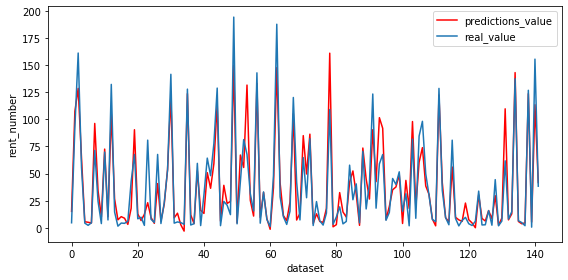

In [11]:
Plot(preds,y_test)